In [31]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

#  <u>Load Data</u>

This data frame contains the following columns:

**crim**
per capita crime rate by town.

**zn**
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**
proportion of non-retail business acres per town.

**chas**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**
nitrogen oxides concentration (parts per 10 million).

**rm**
average number of rooms per dwelling.

**age**
proportion of owner-occupied units built prior to 1940.

**dis**
weighted mean of distances to five Boston employment centres.

**rad**
index of accessibility to radial highways.

**tax**
full-value property-tax rate per $10,000.

**ptratio**
pupil-teacher ratio by town.

**black**
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat**
lower status of the population (percent).

**medv**
median value of owner-occupied homes in $1000s.

In [32]:
#Load data
from sklearn.datasets import load_boston 
boston = load_boston()

In [33]:
#Get column names, less messy names
column_names = [x.lower() for x in load_boston()['feature_names']]

In [34]:
#Make DataFrame
df = pd.DataFrame(boston.data, columns = column_names)
df['price'] = boston.target

#Rename b with balck.
df.rename({"b": "black"}, axis=1, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


# <u>Data Visualization <u>
* ###  Histograms

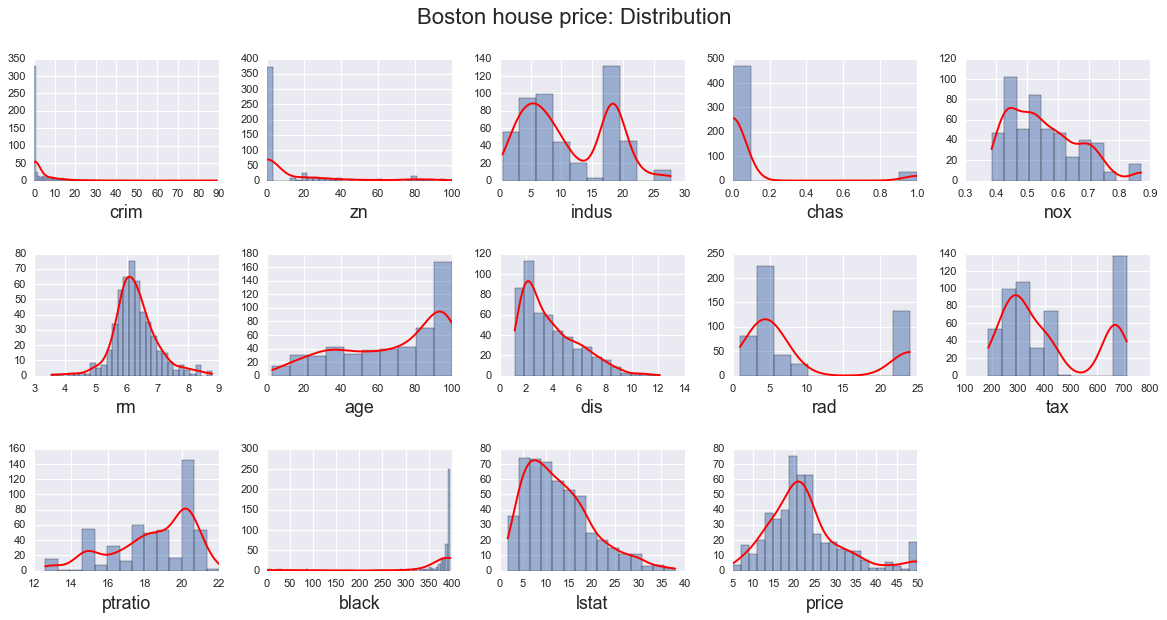

In [43]:
def plot_hist(df, title = ''): 
    #sns.set_context('paper')
    plt.style.use('classic')
    plt.style.use('seaborn')
    #sns.set_context('talk')
    attributeNames=df.columns.tolist()
    M=len(attributeNames)
    u = np.floor(np.sqrt(M)); v = np.ceil(float(M)/u)

    fig = plt.figure(figsize=(18,8))
    fig.subplots_adjust(hspace=.6, wspace=.26)
    plt.suptitle(title, size=20);

    for i in range(M):
        attribute_Name = str(attributeNames[i])
        D1 = df[attribute_Name]
        plt.subplot(int(u),int(v),i+1)
        ax=sns.histplot(D1,kde = True)
        ax.lines[0].set_color('red')
        #plt.yscale('log')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10) 
        ax.set_xlabel(attribute_Name,fontsize=16)
        ax.set_ylabel('',fontsize=10)      
        #plt.style.available
    plt.show()
    #plt.style.use('default')
plot_hist(df, title = 'Boston house price: Distribution')

* ### Box Plots

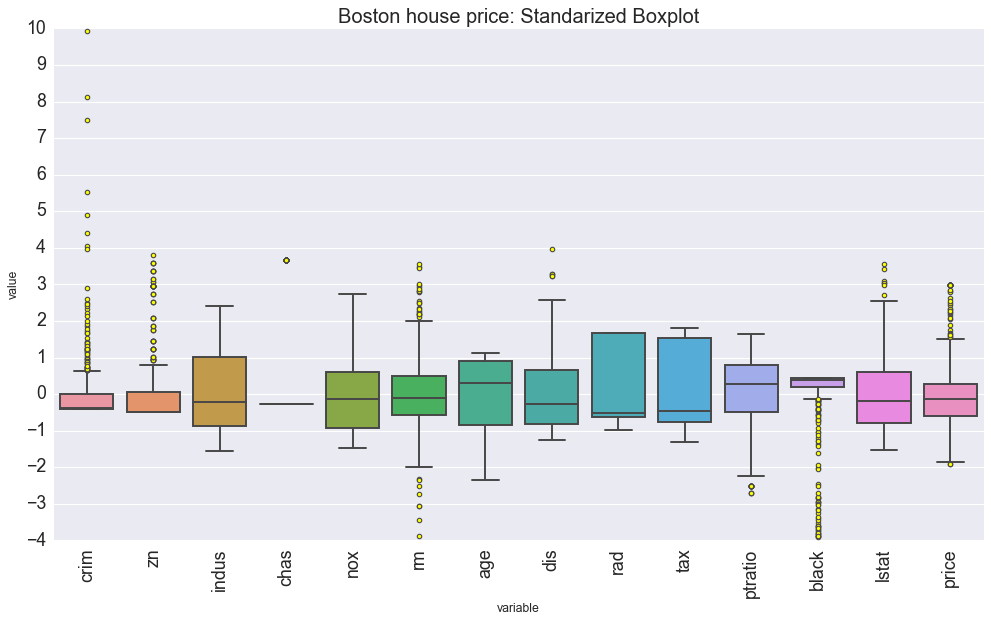

In [44]:
from scipy.stats import zscore
plt.figure(figsize=(15,8))
plt.title('Boston house price: Standarized Boxplot',fontsize=18)

beauty_box = dict(markerfacecolor='yellow', marker='o',markersize=4)
sns.boxplot(x="variable", y="value", data=pd.melt(zscore(df)),
           flierprops=beauty_box)

plt.xticks(fontsize=16, rotation=90) ;
plt.yticks(range(-4,11,1) ,fontsize=16);

* ### Correlation

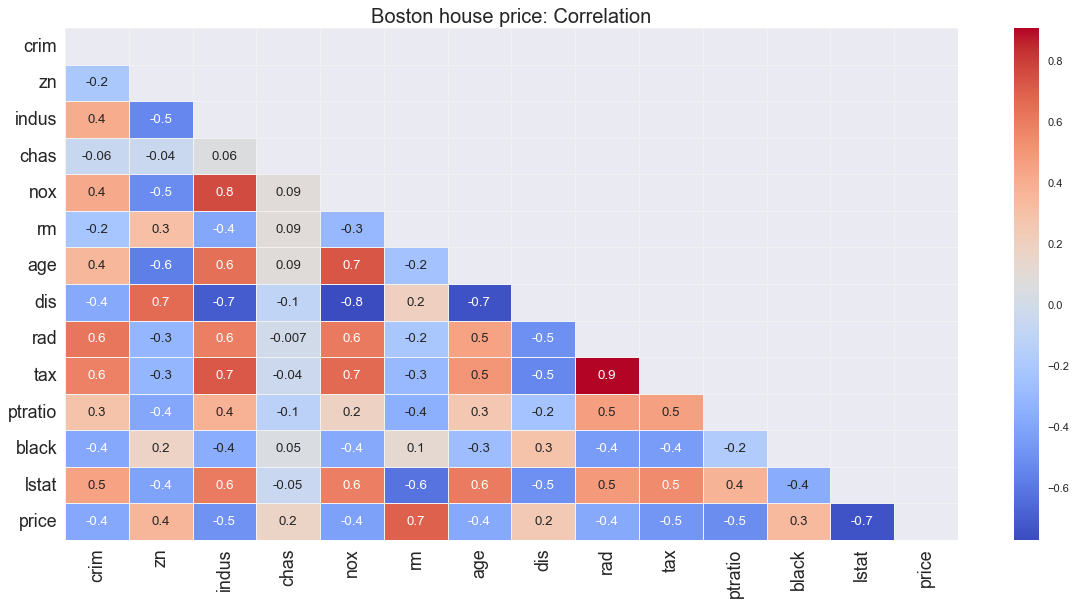

In [90]:
#write code here for heatmap
#sns.set_context('talk')
def cor_heat_map(df, title=''):
    plt.figure(figsize=(18,8))
    plt.title(title, fontsize = 18)
    cor = df.corr()
    plt.xticks(fontsize=16, rotation=90)
    plt.yticks(fontsize=16)

    mask = np.zeros_like(cor,dtype=bool)
    mask[np.triu_indices_from(mask)]=True
    cor[mask]=np.nan

    sns.heatmap(cor, annot=True, fmt='.1g',linewidth=.5,cmap="coolwarm",linecolor='#f1f1f1');
    plt.style.use('seaborn')

cor_heat_map(df, title='Boston house price: Correlation')

#  <u>Creating Independent and Dependent Variables.<u>

In [47]:
X = df.drop(['price'], axis=1)
Y = df[['price']]
print(f'Independent Variable Shape = {X.shape}')
print(f'Dependent Variable Sahpe =  {Y.shape}')

Independent Variable Shape = (506, 13)
Dependent Variable Sahpe =  (506, 1)


# <u>Normalization.<u>

In [6]:
# scale the features
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)

X = pd.DataFrame(x_scaled_minmax, columns = column_names)
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00,0.18,0.07,0.00,0.31,0.58,0.64,0.27,0.00,0.21,0.29,1.00,0.09
1,0.00,0.00,0.24,0.00,0.17,0.55,0.78,0.35,0.04,0.10,0.55,1.00,0.20
2,0.00,0.00,0.24,0.00,0.17,0.69,0.60,0.35,0.04,0.10,0.55,0.99,0.06
3,0.00,0.00,0.06,0.00,0.15,0.66,0.44,0.45,0.09,0.07,0.65,0.99,0.03
4,0.00,0.00,0.06,0.00,0.15,0.69,0.53,0.45,0.09,0.07,0.65,1.00,0.10


# <u>Train Test Splitting.<u>

In [7]:
from sklearn.model_selection import train_test_split

xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=25)

In [8]:
# Check Size 

print(f'Training Data:\t X_train = {xtrain.shape}\t Y_train = {ytrain.shape}')
print(f'Testing Data:\t X_test = {xtest.shape}\t Y_test = {ytest.shape}')

Training Data:	 X_train = (354, 13)	 Y_train = (354, 1)
Testing Data:	 X_test = (152, 13)	 Y_test = (152, 1)


# <u>Training Model, Predicting & Testing.</u>

In [9]:
# Load model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
# Train Model
model.fit(xtrain, ytrain)

LinearRegression()

In [11]:
# Predict on test values
pred = model.predict(xtest)

**Model parameters:**

$y=\beta_0+\beta_1*x+\epsilon \text{   } $

$\beta$ values >> Slope >>  `model.coef_`

$\epsilon$ >> intercept >> `model.intercept_`

In [12]:
# Model parameters 
print(f'Model slope:  = \n {model.coef_}')

Model slope:  = 
 [[-10.25416832   5.05163648   0.7465737    0.73047106  -9.22588505
   21.03952249  -0.4688927  -17.04518353   8.45182117  -8.73511563
   -9.26613212   2.95271586 -16.64030396]]


In [13]:
print(f'Model intercept:  = {model.intercept_}')

Model intercept:  = [27.43583278]


# <u> Checking r2 by sklearn metric</u>
R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.

In [109]:
from sklearn.metrics import r2_score
test_r2=r2_score(ytest,pred)
test_r2

0.7133593313710358

In [49]:
train_r2=r2_score(ytrain,model.predict(xtrain))
train_r2

0.7435787589010061

In [50]:
print('R2 score for testing:',test_r2 )
print('R2 score for training:',train_r2 )

R2 score for testing: 0.7133593313710358
R2 score for training: 0.7435787589010061


In [51]:
r_2 = []
for i in range(1, (xtest.shape[-1])+1):
    m=LinearRegression()
    m.fit(xtrain.values[:,:i],ytrain)
    prd=m.predict(xtest.values[:,:i])
    r_2.append(r2_score(ytest,prd))

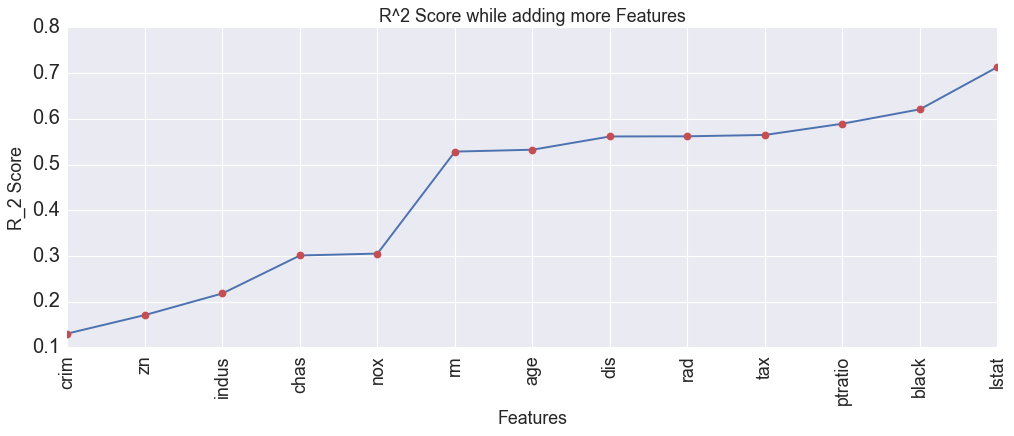

In [88]:
plt.figure(figsize=(15,5))
plt.plot(r_2, marker='o',  markerfacecolor = 'r');
plt.xlabel('Features', fontsize=16);
plt.ylabel('R_2 Score', fontsize=16);
plt.xticks(range(0,len(X.columns)), X.columns.to_list(), fontsize=16, rotation=90);
plt.yticks(fontsize=18);
plt.title('R^2 Score while adding more Features', fontsize=16);

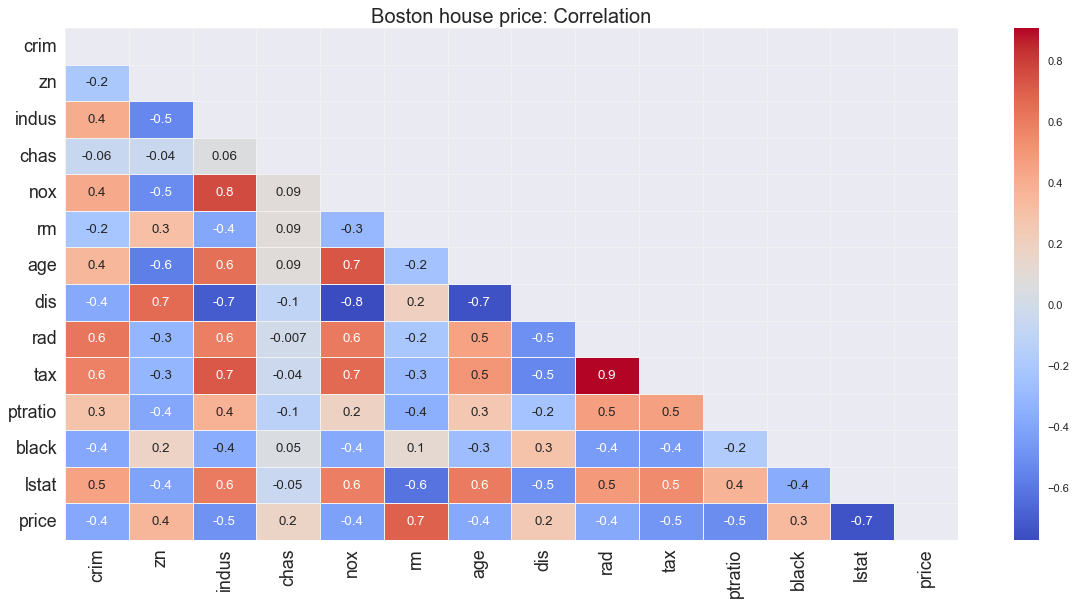

In [92]:
# lest see how Correlation relate to increase in R^2 score 
cor_heat_map(df, title='Boston house price: Correlation')

# <u>Adjusted R2 Calculation</u>

In [93]:
def adjR2 (xtest,ytest,r2):
	n = len(ytest)
	k = xtest.shape[-1]
	adj_r2 = 1 - ((1 - r2)*(n - 1)) / (n - k -1)
	print('The adjusted R2 is:', adj_r2)

In [94]:
adjR2(xtest,ytest,test_r2)

The adjusted R2 is: 0.6863569495436697


**Ploting Residual Plots**
A residual is the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The ResidualsPlot Visualizer shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

If the points are randomly dispersed around the horizontal axis, a linear regression model is usually well-suited for the data; otherwise, a non-linear model is more appropriate. The following example shows a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well.

Yellowbrick's ResidualsPlot Visualizer also displays a histogram of the error values along the right-hand side. In the example above, the error is normally distributed around zero, which also generally indicates a well-fitted model. If the histogram is not desired, it can be turned off with the hist=False flag.

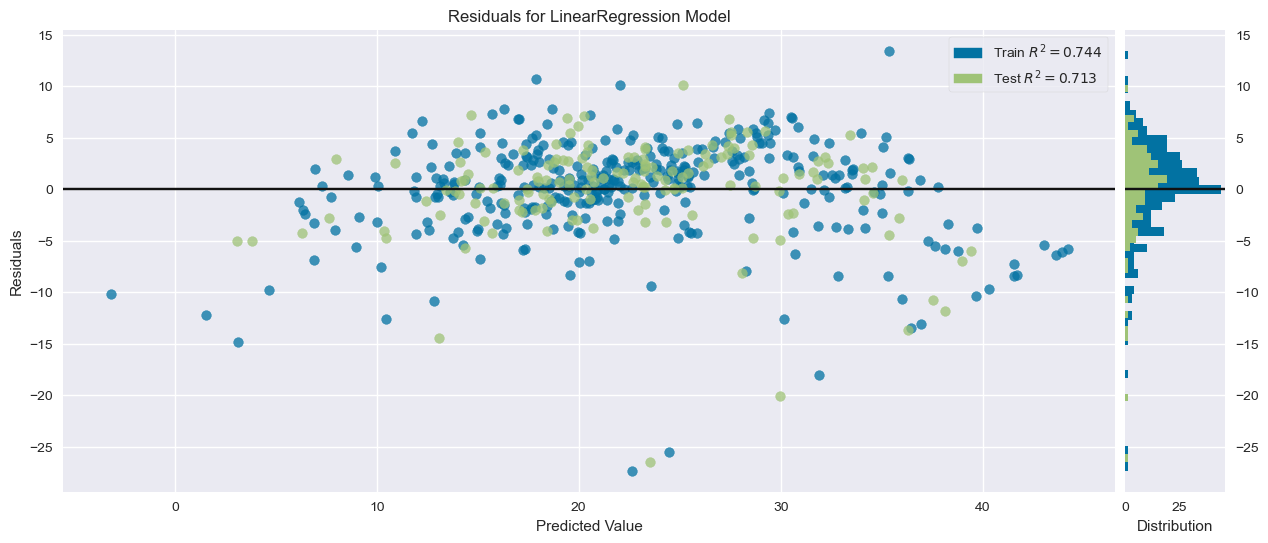

In [107]:
from yellowbrick.regressor import ResidualsPlot
plt.style.use('default')
plt.style.use('seaborn')
plt.figure(figsize=(15,6)) 
visualizer = ResidualsPlot(model,hist=True)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof()  ;